In [3]:
import kagglehub

# download the latest version of the dataset
path = kagglehub.dataset_download("parisrohan/credit-score-classification")

# print the path where the dataset files are stored
print("Path to dataset files: ", path)

100%|██████████| 9.51M/9.51M [00:00<00:00, 11.9MB/s]

Extracting files...


Path to dataset files:  /root/.cache/kagglehub/datasets/parisrohan/credit-score-classification/versions/1


In [4]:
# load the dataset
import pandas as pd

# csv file path
dataset_path = path + "/train.csv"

# load the dataset into a pandas dataframe
df = pd.read_csv(dataset_path)

# display the first few rows of the dataset
df.head()

<ipython-input-4-fe157cb29846>:8: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
# check for missing values and data types
df.info()

# check the first few rows to understand the structure
df.head()

# descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [16]:
# Handle missing values by imputing with median for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Handle missing values in non-numeric columns by imputing with the mode
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify that there are no missing values
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [18]:
# drop non-predictive columns
df = df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN'])

KeyError: "['ID', 'Customer_ID', 'Name', 'SSN'] not found in axis"

In [20]:
# Step 1: Identify non-numeric values in the numerical columns
numeric_cols = ['Annual_Income', 'Outstanding_Debt', 'Monthly_Balance']
for col in numeric_cols:
    print(f"Unique values in {col}: {df[col].unique()[:10]}")  # Display first 10 unique values for inspection

# Step 2: Remove or replace invalid values
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replacing invalid values with NaN

# Step 3: Handle missing values (e.g., fill with median)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Step 4: Feature scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 5: Check the dataset
print(df.head())

Unique values in Annual_Income: ['19114.12' '34847.84' '34847.84_' '143162.64' '30689.89' '30689.89_'
 '35547.71_' '35547.71' '73928.46' '131313.4']
Unique values in Outstanding_Debt: ['809.98' '605.03' '1303.01' '632.46' '943.86' '548.2' '352.16' '1704.18'
 '1377.74' '421.43']
Unique values in Monthly_Balance: ['312.49408867943663' '284.62916249607184' '331.2098628537912'
 '223.45130972736786' '341.48923103222177' '340.4792117872438'
 '244.5653167062043' '358.12416760938714' '470.69062692529184'
 '484.5912142650067']
      Month   Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   January    23      -0.107481            1824.843333                  3   
1  February    23      -0.107481            3093.745000                  3   
2     March  -500      -0.107481            3093.745000                  3   
3     April    23      -0.107481            3093.745000                  3   
4       May    23      -0.107481            1824.843333                  3   

   Num_

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features (X) and target variable (y)
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for categorical columns (one-hot encoding)
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply OneHotEncoder with handle_unknown='ignore'
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Create pipelines for Logistic Regression and LightGBM
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline_lgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier())
])

# Train Logistic Regression and LightGBM models
pipeline_lr.fit(X_train, y_train)
pipeline_lgb.fit(X_train, y_train)

# Evaluate models
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_lgb = pipeline_lgb.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))

# Print classification reports for both models
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.431206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7811
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 2607
[LightGBM] [Info] Start training from score -1.721697
[LightGBM] [Info] Start training from score -1.241156
[LightGBM] [Info] Start training from score -0.630759


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Logistic Regression Accuracy: 0.576
LightGBM Accuracy: 0.7173
Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Good       0.51      0.15      0.23      3527
        Poor       0.63      0.33      0.43      5874
    Standard       0.57      0.86      0.68     10599

    accuracy                           0.58     20000
   macro avg       0.57      0.44      0.45     20000
weighted avg       0.58      0.58      0.53     20000

LightGBM Classification Report:
              precision    recall  f1-score   support

        Good       0.62      0.68      0.65      3527
        Poor       0.71      0.69      0.70      5874
    Standard       0.75      0.75      0.75     10599

    accuracy                           0.72     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.72      0.72      0.72     20000



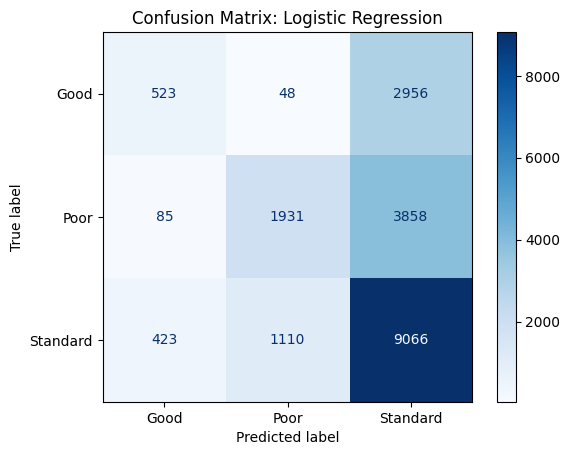

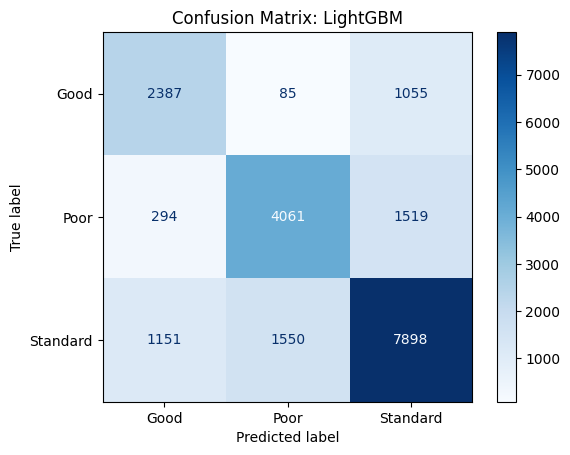


Top 10 Features by Importance (LightGBM):
Outstanding_Debt: 714
Total_EMI_per_month: 541
Interest_Rate: 539
Delay_from_due_date: 463
Annual_Income: 362
Num_Credit_Card: 334
Monthly_Inhand_Salary: 325
Num_Bank_Accounts: 281
Num_Credit_Inquiries: 246
Monthly_Balance: 212


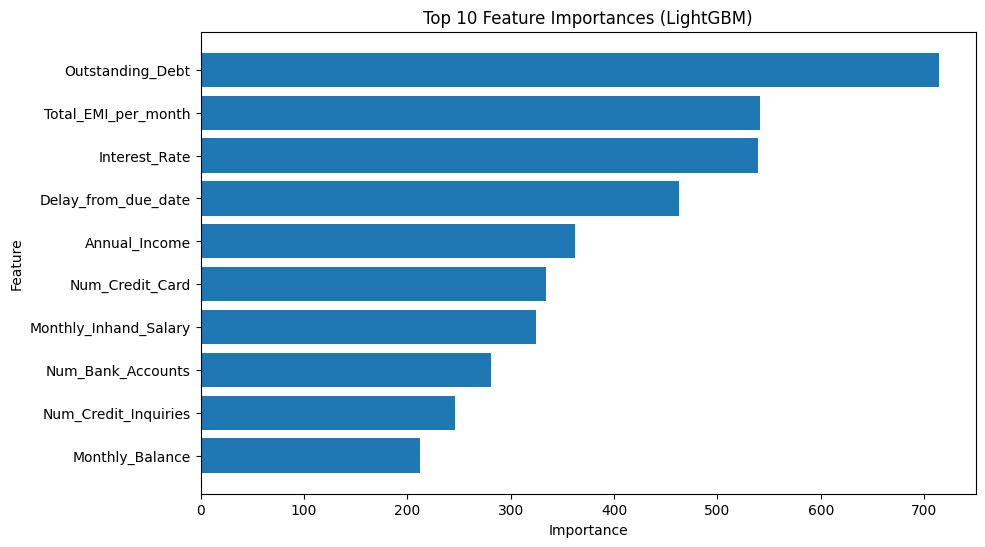

In [27]:
# Confusion Matrix and Visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=pipeline_lr.named_steps['classifier'].classes_)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Plot confusion matrix for LightGBM
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=pipeline_lgb.named_steps['classifier'].classes_)
disp_lgb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: LightGBM")
plt.show()

# Feature Importance (LightGBM)
import numpy as np

# Get feature importances
importances = pipeline_lgb.named_steps['classifier'].feature_importances_

# Extract categorical and numerical feature names
categorical_features = pipeline_lgb.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
numerical_features = X.select_dtypes(exclude=['object']).columns

# Combine categorical and numerical feature names
all_features = np.concatenate([categorical_features, numerical_features])

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_features = all_features[sorted_indices]
sorted_importances = importances[sorted_indices]

# Display top 10 features
print("\nTop 10 Features by Importance (LightGBM):")
for i in range(10):
    print(f"{sorted_features[i]}: {sorted_importances[i]}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10][::-1], sorted_importances[:10][::-1])
plt.title("Top 10 Feature Importances (LightGBM)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()